### Importing of Libraries

In [560]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
nltk.download("stopwords")
nltk.download("punkt")
nltk.download("wordnet")
import re
import gensim

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\CapoBizkitz\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\CapoBizkitz\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\CapoBizkitz\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


### Data Loading

In [561]:
train = pd.read_csv('https://raw.githubusercontent.com/Tariq60/LIAR-PLUS/master/dataset/tsv/train2.tsv', delimiter='\t', encoding='utf-8', names=
                        ["json ID", "label", "statement", "subject", "speaker", "job title", "state", "party",
                         "barely true", "false", "half true", "mostly true", "pants on fire", "los", "justification"])
train.name = 'Training Data'

test = pd.read_csv('https://raw.githubusercontent.com/Tariq60/LIAR-PLUS/master/dataset/tsv/test2.tsv', delimiter='\t', encoding='utf-8', names=
                        ["json ID", "label", "statement", "subject", "speaker", "job title", "state", "party",
                         "barely true", "false", "half true", "mostly true", "pants on fire", "los", "justification"])
test.name = 'Testing Data'

### Removing any null values from the Label or Json ID attribute

In [562]:
null_columns=train.columns[train.isnull().any()]
train[null_columns].isnull().sum()

json ID             2
label               2
statement           2
subject             4
speaker             4
job title        2899
state            2210
party               4
barely true         4
false               4
half true           4
mostly true         4
pants on fire       4
los               104
justification      88
dtype: int64

In [563]:
null_columns=test.columns[test.isnull().any()]
test[null_columns].isnull().sum()

job title        325
state            262
los               17
justification      9
dtype: int64

In [564]:
print(train[train["label"].isnull()][null_columns])

    job title state  los justification
NaN       NaN   NaN  NaN           NaN
NaN       NaN   NaN  NaN           NaN


In [565]:
train = train[train['json ID'].notna()]

In [566]:
print(train[train["label"].isnull()][null_columns])

Empty DataFrame
Columns: [job title, state, los, justification]
Index: []


In [567]:
train.shape

(10240, 15)

In [568]:
test.shape

(1267, 15)

### Display the class distribution Training Data and Testing Data

In [569]:
train['label'].value_counts()

half-true      2114
false          1995
mostly-true    1962
true           1676
barely-true    1654
pants-fire      839
Name: label, dtype: int64

In [570]:
tr_half_true = train['label'].value_counts()[0]
tr_false = train['label'].value_counts()[1]
tr_mostly_true = train['label'].value_counts()[2]
tr_true = train['label'].value_counts()[3]
tr_barely_true = train['label'].value_counts()[4]
tr_pants_fire = train['label'].value_counts()[5]

Bar Plot showing label distribution for Train

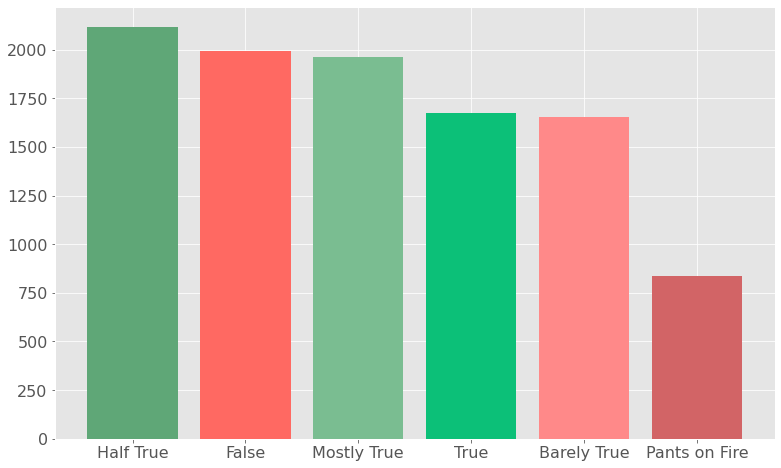

In [571]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(10,6))
ax = fig.add_axes([0,0,1,1])
labels = ['Half True', 'False', 'Mostly True', 'True', 'Barely True', 'Pants on Fire']
distrib = [tr_half_true, tr_false, tr_mostly_true, tr_true, tr_barely_true, tr_pants_fire]
ax.bar(labels, distrib, color=['#5FA777', '#FF6962', '#7ABD91', '#0CC078', '#FF8989', '#D26466'])
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.show()

In [572]:
test['label'].value_counts()

half-true      265
false          249
mostly-true    241
barely-true    212
true           208
pants-fire      92
Name: label, dtype: int64

In [573]:
ts_half_true = test['label'].value_counts()[0]
ts_false = test['label'].value_counts()[1]
ts_mostly_true = test['label'].value_counts()[2]
ts_true = test['label'].value_counts()[3]
ts_barely_true = test['label'].value_counts()[4]
ts_pants_fire = test['label'].value_counts()[5]

Bar Plot showing label distribution for Test

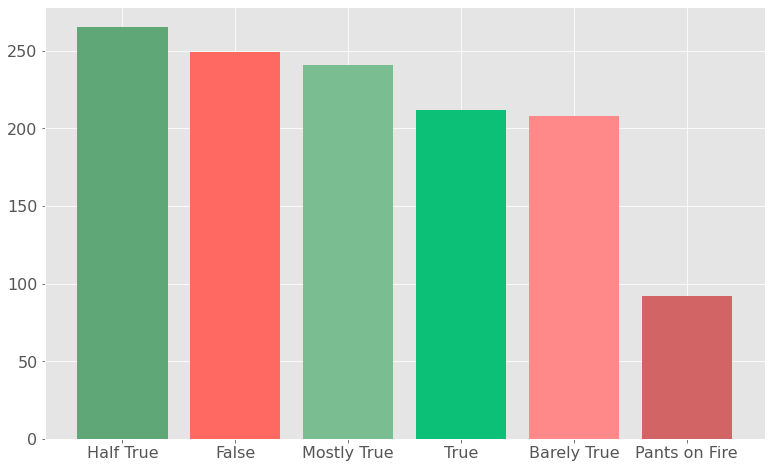

In [574]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(10,6))
ax = fig.add_axes([0,0,1,1])
labels = ['Half True', 'False', 'Mostly True', 'True', 'Barely True', 'Pants on Fire']
distrib = [ts_half_true, ts_false, ts_mostly_true, ts_true, ts_barely_true, ts_pants_fire]
ax.bar(labels, distrib, color=['#5FA777', '#FF6962', '#7ABD91', '#0CC078', '#FF8989', '#D26466'])
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.show()

### Combining statement and justification attributes

In [575]:
train['new'] = train['statement'].map(str) + train['justification'].map(str)
test['new'] = test['statement'].map(str) + test['justification'].map(str)

### Determening the average length of words for before and after preprocessing

In [576]:
ppr_train = pd.read_csv("../../dataset/PreprocessedLiar/train3.csv")

In [577]:
ppr_test = pd.read_csv("../../dataset/PreprocessedLiar/train3.csv")

Before Preprocessing

In [578]:
words_train = pd.DataFrame(train['new'].tolist()).apply(lambda x: x.str.len()).mean(axis=1)
words_test = pd.DataFrame(test['new'].tolist()).apply(lambda x: x.str.len()).mean(axis=1)

In [579]:
avg_words_train = words_train.mean()
avg_words_test = words_test.mean()
print(avg_words_train)
print(avg_words_test)

533.4892578125
550.3172849250197


After Preprocessing

In [580]:
ppr_words_train = pd.DataFrame(ppr_train['cleaned_statement'].tolist()).apply(lambda x: x.str.len()).mean(axis=1)
ppr_words_test = pd.DataFrame(ppr_test['cleaned_statement'].tolist()).apply(lambda x: x.str.len()).mean(axis=1)

In [581]:
avg_ppr_words_train = ppr_words_train.mean()
avg_ppr_words_test = ppr_words_test.mean()
print(avg_ppr_words_train)
print(avg_ppr_words_test)

278.1658203125
278.1658203125


Bar plot showing the average length of words before and after preprocessing

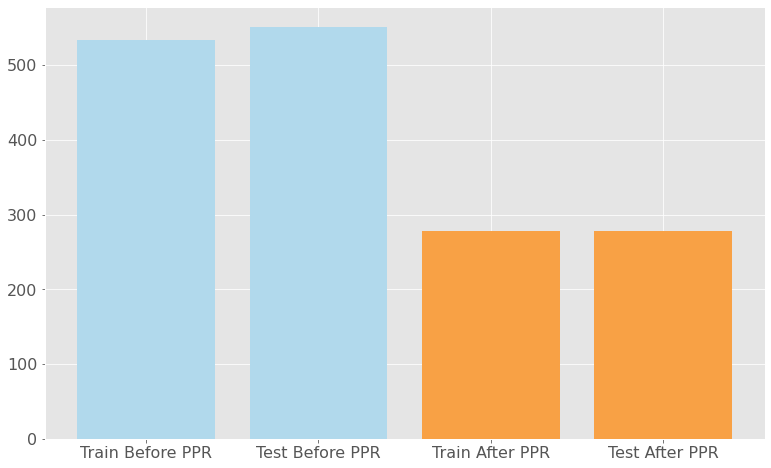

In [582]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(10,6))
ax = fig.add_axes([0,0,1,1])
dataset = ['Train Before PPR', 'Test Before PPR', 'Train After PPR', 'Test After PPR']
wordLength = [avg_words_train, avg_words_test, avg_ppr_words_train, avg_ppr_words_test]
ax.bar(dataset, wordLength, color=['#B1D9EC', '#B1D9EC', '#F8A145', '#F8A145'])
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.show()

In [583]:
test['new'].sample(5)

537    The problem of unwanted sexual contacts in the...
612    Obama has "visited more countries and met with...
551    A new ruling by the EPA would force dairy farm...
658    Says that, unlike the U.S. Senate, even the Li...
640    A telephone company will no longer have to pro...
Name: new, dtype: object

### Plotting a Bubble Plot to show words with word count over 3000

combine dataset

In [584]:
dataset = ppr_train.append(ppr_test, ignore_index=True)

<ipython-input-584-f09bc1b4f5bd>:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataset = ppr_train.append(ppr_test, ignore_index=True)


Create a new dataframe

In [585]:
new_df = dataset.cleaned_statement.str.split(expand=True).stack().value_counts().reset_index()

new_df.columns = ['Word', 'Frequency'] 

fr = new_df['Frequency']

new_df  
  

,Word,Frequency
0,say,21170
1,state,10750
2,year,8508
3,percent,7542
4,obama,6096
...,...,...
14073,strive,2
14074,mobilitythan,2
14075,centr,2
14076,venic,2


Convert freqeuncy column to numeric

In [586]:
pd.to_numeric(fr)

0        21170
1        10750
2         8508
3         7542
4         6096
         ...  
14073        2
14074        2
14075        2
14076        2
14077        2
Name: Frequency, Length: 14078, dtype: int64

In [587]:
new_df['Frequency'] = fr

Only keep rows with frequency over 3200

In [588]:
new_df = new_df[new_df['Frequency'] > 3600]

In [589]:
len(new_df)

10

Assign a color and size to bubbles

In [592]:
new_df['bubble_size'] = fr/4
new_df['color'] = np.random.rand(10)

<ipython-input-592-3c906d308a96>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['bubble_size'] = fr/4
<ipython-input-592-3c906d308a96>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['color'] = np.random.rand(10)


In [591]:
new_df.sample(10)

,Word,Frequency,bubble_size
4,obama,6096,1524.0
7,peopl,4026,1006.5
9,million,3626,906.5
5,vote,4834,1208.5
1,state,10750,2687.5
0,say,21170,5292.5
2,year,8508,2127.0
8,time,3782,945.5
3,percent,7542,1885.5
6,number,4086,1021.5


Decalare plotting values

In [593]:
df = pd.DataFrame({
    'X': new_df['Word'],
    'Y': new_df['Frequency'],
    'bubble_size': new_df['bubble_size'],
    'color': new_df['color']})
df.head()

,X,Y,bubble_size,color
0,say,21170,5292.5,0.885989
1,state,10750,2687.5,0.568343
2,year,8508,2127.0,0.961065
3,percent,7542,1885.5,0.543181
4,obama,6096,1524.0,0.465874




```
# This is formatted as code
```

Plotting a bubble plot to display Word Count

(array([ 2500.,  5000.,  7500., 10000., 12500., 15000., 17500., 20000.,
        22500.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

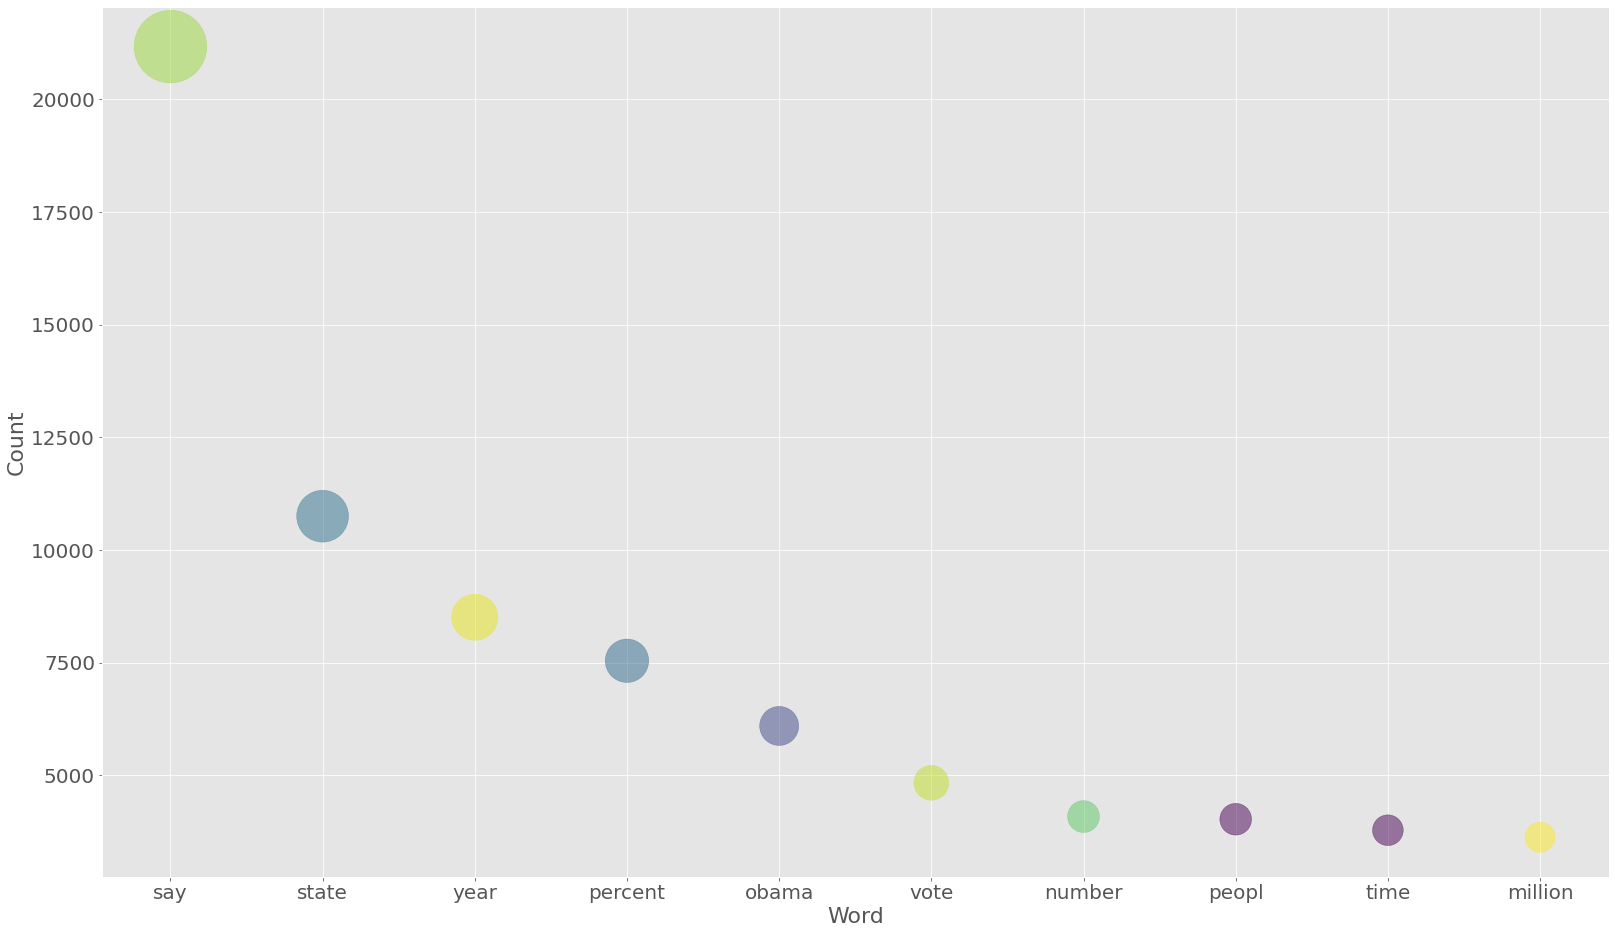

In [602]:
plt.figure(figsize=(27,16))
plt.style.use('ggplot')
plt.scatter('X', 'Y', s='bubble_size', c='color', alpha=0.5, data=df)
plt.xlabel("Word", size=22)
plt.ylabel("Count", size=22)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

### Pre-Processing of Train and Test

In [95]:
#!pip install spacy==2.2.3
#!python -m spacy download en_core_web_sm
#!pip install beautifulsoup4==4.9.1
#!pip install textblob==0.15.3
#!pip install git+https://github.com/laxmimerit/preprocess_kgptalkie.git --upgrade --force-reinstall

### remove special characters

In [96]:
import preprocess_kgptalkie as ps

train['new'].apply(lambda x: ps.remove_special_chars(x))
test['new'].apply(lambda x: ps.remove_special_chars(x))

0       Building a wall on the USMexico border will ta...
1       Wisconsin is on pace to double the number of l...
2       Says John McCain has done nothing to help the ...
3       Suzanne Bonamici supports a plan that will cut...
4       When asked by a reporter whether hes at the ce...
                              ...                        
1278    Says his budget provides the highest state fun...
1279    Ive been here almost every dayAfter making his...
1280    In the early 1980s Sen Edward Kennedy secretly...
1281    Says an EPA permit languished under Strickland...
1282    Says the governor is going around the state ta...
Name: new, Length: 1267, dtype: object

### remove stop words

In [97]:
# Remove stopwords and remove words with 2 or less characters using gensim
from nltk.corpus import stopwords
stop_words = stopwords.words('english')

def preprocess(text):
    result = []
    for token in gensim.utils.simple_preprocess(text):
        if token not in gensim.parsing.preprocessing.STOPWORDS and len(token) > 3 and token not in stop_words:
            result.append(token)
            
    return result

In [98]:
# Apply the function to the dataframe
train['new'] = train['new'].apply(preprocess)
test['new'] = test['new'].apply(preprocess)

In [105]:
train['new']

0.0        says annies list political group supports trim...
1.0        decline coal start started natural took starte...
2.0        hillary clinton agrees john mccain voting geor...
3.0        health care reform legislation likely mandate ...
4.0        economic turnaround started term crist said ec...
                                 ...                        
10264.0    larger number shark attacks florida cases vote...
10265.0    democrats party atlanta metro area blacks romn...
10266.0    says alternative social security operates galv...
10267.0    lifting cuban embargo allowing travel cuba che...
10268.0    department veterans affairs manual telling vet...
Name: new, Length: 10240, dtype: object

### Lammetizing Text with noun

In [102]:
# import nltk
# from nltk.stem import WordNetLemmatizer
# lemmatizer = WordNetLemmatizer()

# def Lammetize(text):
#     word_list = nltk.word_tokenize(text)
#     lammetized_output = ' '.join([lemmatizer.lemmatize(w, 'n') for w in word_list])

#     return lammetized_output

In [104]:
train['new'] = train['new'].apply(lambda x: " ".join(x))
test['new'] = test['new'].apply(lambda x: " ".join(x))

In [106]:
# # Apply the function to the dataframe
# train['new'] = train['new'].apply(Lammetize)
# test['new'] = test['new'].apply(Lammetize)

In [107]:
train['new']

0.0        say annies list political group support trimes...
1.0        decline coal start started natural took starte...
2.0        hillary clinton agrees john mccain voting geor...
3.0        health care reform legislation likely mandate ...
4.0        economic turnaround started term crist said ec...
                                 ...                        
10264.0    larger number shark attack florida case voter ...
10265.0    democrat party atlanta metro area black romney...
10266.0    say alternative social security operates galve...
10267.0    lifting cuban embargo allowing travel cuba che...
10268.0    department veteran affair manual telling veter...
Name: new, Length: 10240, dtype: object

Removes any white spaces in the text

In [108]:
train['new'].str.strip()
test['new'].str.strip()

0       building wall mexico border literally year mea...
1       wisconsin pace double number layoff year cited...
2       say john mccain help vet trump said mccain hel...
3       suzanne bonamici support plan choice medicare ...
4       asked reporter center criminal scheme violate ...
                              ...                        
1278    say budget provides highest state funding leve...
1279    making pledge obama said budget soon propose l...
1280    early edward kennedy secretly offered help sov...
1281    say permit languished strickland director day ...
1282    say governor going state talking fund income b...
Name: new, Length: 1267, dtype: object

In [109]:
train['new'].sample(5)

2547.0    thirty state accepted high speed intercity rai...
4492.0    say michelle nunn amnesty boehner said epa pla...
116.0     majority state marry freely fired love mean st...
623.0     tenured teacher year dismissed incompetence st...
5563.0    average republican voter think revenue deal se...
Name: new, dtype: object

In [110]:
test['new'].sample(5)

404     election vote cast registered voter lucie coun...
523     say portland household year long composting pi...
1122    medium crowd boxer said half woman birth contr...
488     favor plan attacking party meaningful force pe...
619     lorain poorest urban school district state ohi...
Name: new, dtype: object

Restructure dataset to fit the data we need

In [111]:
train = train.rename(columns = {'json ID': 'articleId', 'new': 'cleaned_statement'}, inplace = False)
test = test.rename(columns = {'json ID': 'articleId', 'new': 'cleaned_statement'}, inplace = False)

In [112]:
test['articleId'] = test['articleId'].str.split('.').str[0]
train['articleId'] = train['articleId'].str.split('.').str[0]

In [113]:
train_set = train[['articleId', 'cleaned_statement', 'label']]
test_set = test[['articleId', 'cleaned_statement', 'label']]

In [114]:
test_set['cleaned_statement'].sample(5)

1147    claim obama said oppose policy shut away quint...
141     iraq study group reported saddam hussein desig...
931     medicare percent american older health care co...
366     say main central texas food bank delivering pe...
686     impeachment anybody history country checked se...
Name: cleaned_statement, dtype: object

In [115]:
train_set['articleId'].sample(5)

2056.0     11755
10258.0     4423
4033.0      7098
9396.0     11302
8156.0      8150
Name: articleId, dtype: object

Save to CSV

In [116]:
#train_set.to_csv(r'train.csv', index = False)

In [117]:
#test_set.to_csv(r'test.csv', index = False)